In [11]:
# load the spam data
import pandas as pd
df = pd.read_csv("../data/Spam.txt")

In [12]:
# PAGE 301. We coded spam as 1 and email as zero. A test set of size 1536 was
#           randomly chosen, leaving 3065 observations in the training set.
target = 'spam'
columns = ['word_freq_make', 'word_freq_address', 'word_freq_all',
           'word_freq_3d', 'word_freq_our', 'word_freq_over',
           'word_freq_remove', 'word_freq_internet', 'word_freq_order',
           'word_freq_mail', 'word_freq_receive', 'word_freq_will',
           'word_freq_people', 'word_freq_report', 'word_freq_addresses',
           'word_freq_free', 'word_freq_business', 'word_freq_email',
           'word_freq_you', 'word_freq_credit', 'word_freq_your',
           'word_freq_font', 'word_freq_000', 'word_freq_money',
           'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
           'word_freq_650', 'word_freq_lab', 'word_freq_labs',
           'word_freq_telnet', 'word_freq_857', 'word_freq_data',
           'word_freq_415', 'word_freq_85', 'word_freq_technology',
           'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
           'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
           'word_freq_original', 'word_freq_project', 'word_freq_re',
           'word_freq_edu', 'word_freq_table', 'word_freq_conference',
           'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
           'char_freq_$', 'char_freq_#', 'capital_run_length_average',
           'capital_run_length_longest', 'capital_run_length_total']
# let's give columns more compact names
features = ['make', 'address', 'all', '3d', 'our', 'over', 'remove',
            'internet', 'order', 'mail', 'receive', 'will', 'people',
            'report', 'addresses', 'free', 'business', 'email', 'you',
            'credit', 'your', 'font', '000', 'money', 'hp', 'hpl',
            'george', '650', 'lab', 'labs', 'telnet', '857', 'data',
            '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
            'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
            'conference', 'ch_;', 'ch(', 'ch[', 'ch!', 'ch$', 'ch#',
            'CAPAVE', 'CAPMAX', 'CAPTOT']

X, y = df[columns].values, df[target].values

# split by test column value
is_test = df.test.values
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]


# tranform the data with log(1+x) transformation as X is too skewed
import numpy as np
X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

### Logistic Regression

In [63]:
# fit X_train, y_train with LogisticRegression and calculate the accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(solver='liblinear', random_state=101)
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_lr)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9414


### Decision Tree

In [65]:
# fit X_train, y_train with DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=101, max_depth=10)
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_tree)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9160


In [54]:
# fit X_train, y_train with DecisionTree, cross-validate the max_leaf_nodes
from sklearn.model_selection import cross_val_score
import numpy as np
max_leaf_nodes = [2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 21, 26, 30, 33, 37, 42]
cv_scores = []
test_scores = []
for leaf in max_leaf_nodes:
    tree = DecisionTreeClassifier(random_state=101, max_leaf_nodes=leaf)
    scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
# plot the accuracies with plotly express
import plotly.express as px
dfPlot = pd.DataFrame({'max_leaf_nodes': max_leaf_nodes, 'accuracy': cv_scores})
fig = px.line(dfPlot, x='max_leaf_nodes', y='accuracy', title='Accuracy vs max_leaf_nodes')
fig.show()

# fit X_train, y_train with DecisionTree, cross-validate the tree depth
from sklearn.model_selection import cross_val_score
import numpy as np
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18, 21, 26, 30]
cv_scores = []
test_scores = []
for depth in max_depth:
    tree = DecisionTreeClassifier(random_state=101, max_depth=depth)
    scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# plot the accuracies with plotly express
import plotly.express as px
dfPlot = pd.DataFrame({'max_depth': max_depth, 'accuracy': cv_scores})
fig = px.line(dfPlot, x='max_depth', y='accuracy', title='Accuracy vs max_depth')
fig.show()


### Gradient Boosting Tree (GBT)

In [58]:
# fit X_train, y_train with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, random_state=101)
gb.fit(X_train, y_train)

y_gb = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_gb)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9518


In [56]:
# cross validate the GradientBoostingClassifier with different n_estimators
from sklearn.model_selection import cross_val_score
import numpy as np
n_estimators = [50, 100, 200, 400]
cv_scores = []
test_scores = []
for n in n_estimators:
    print(f"n_estimators: {n}")
    gb = GradientBoostingClassifier(n_estimators=n, random_state=101)
    scores = cross_val_score(gb, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    test_scores.append(accuracy_score(y_test, gb.fit(X_train, y_train).predict(X_test)))

# plot the cv_scores and test_scores with graph_objects
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=n_estimators, y=cv_scores, mode='lines', name='Cross-validated Accuracy'))
fig.add_trace(go.Scatter(x=n_estimators, y=test_scores, mode='lines', name='Test Accuracy'))
fig.update_layout(title='Accuracy vs n_estimators', xaxis_title='n_estimators', yaxis_title='Accuracy')
fig.show()

# cross validate the GradientBoostingClassifier with different learning_rate
# from sklearn.model_selection import cross_val_score
# import numpy as np
# learning_rate = [0.02, 0.04, 0.1, 0.2, 0.4]
# cv_scores = []
# test_scores = []
# for lr in learning_rate:
#     print(f"learning_rate: {lr}")
#     gb = GradientBoostingClassifier(learning_rate=lr, n_estimators=25, random_state=101)
#     scores = cross_val_score(gb, X_train, y_train, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
#     test_scores.append(accuracy_score(y_test, gb.fit(X_train, y_train).predict(X_test)))


# # plot the cv_scores and test_scores with graph_objects
# import plotly.graph_objects as go
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=learning_rate, y=cv_scores, mode='lines', name='Cross-validated Accuracy'))
# fig.add_trace(go.Scatter(x=learning_rate, y=test_scores, mode='lines', name='Test Accuracy'))
# fig.update_layout(title='Accuracy vs learning_rate', xaxis_title='learning_rate', yaxis_title='Accuracy')
# fig.show()


n_estimators: 50
n_estimators: 100
n_estimators: 200
n_estimators: 400


In [59]:
# fit X_train, y_train with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# if we cross validate on n_estimators, we get 500
# if we cross validate on max_depth, we get 6
# if we cross validate on learning_rate, we get 0.1
gb = GradientBoostingClassifier(n_estimators=500, random_state=101, max_depth=6, learning_rate=0.1)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_gb)
print(f"Accuracy: {accuracy:.4f}")

# calculate the feature importance for the GradientBoostingClassifier
importances = gb.feature_importances_

indices_sorted = np.argsort(importances)[::-1]
importances_sorted = importances[indices_sorted]
features_sorted = np.array(features)[indices_sorted]

# plot the feature importances with plotly express
import plotly.express as px
dfPlot = pd.DataFrame({'features': features_sorted, 'importances': importances_sorted})
fig = px.bar(dfPlot, x='features', y='importances', title='Feature Importances')
fig.show()


Accuracy: 0.9544


Top feature  ['ch$' 'ch!' 'remove']
Top feature importance  [0.28458435 0.15813224 0.14502203]


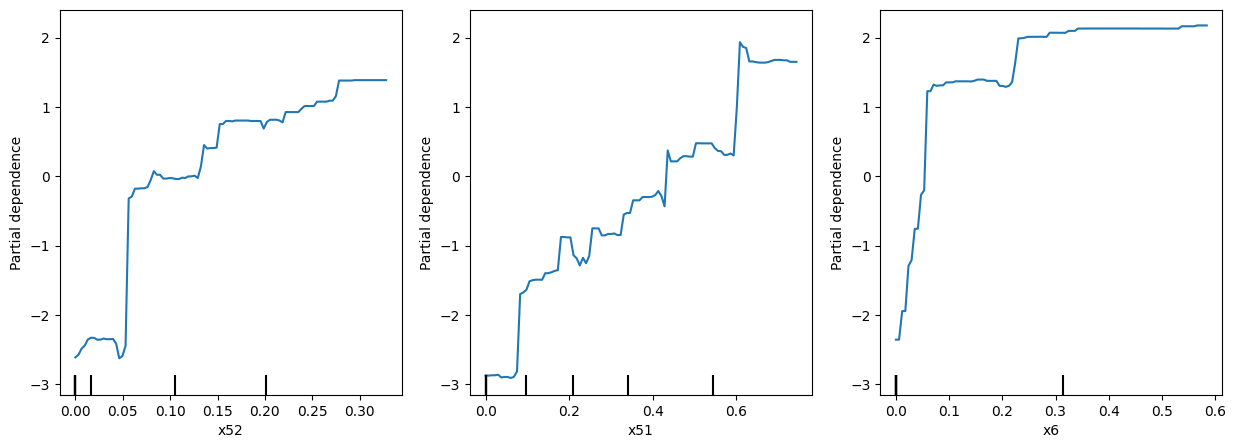

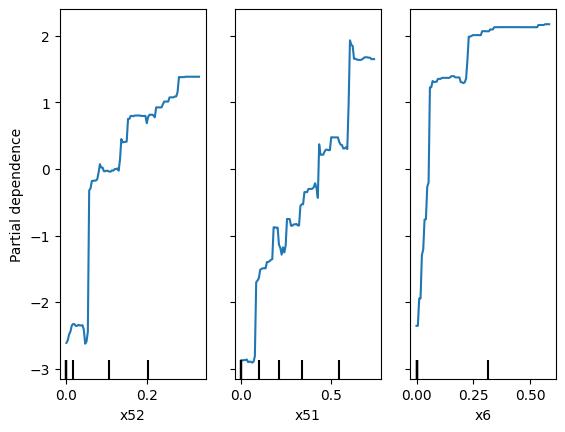

In [60]:
# calculate the partial dependence plot for the GradientBoostingClassifier, plot the top 3 features with the highest importance
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

num_top_features = 3
top_indices = indices_sorted[:num_top_features]
top_featuer_importance = importances[top_indices]
top_feature_names = np.array(features)[top_indices]

print("Top feature ", top_feature_names)
print("Top feature importance ", top_featuer_importance)
fig, ax = plt.subplots(1, num_top_features, figsize=(15, 5))
display = PartialDependenceDisplay.from_estimator(gb, X_train, features=top_indices.tolist(), response_method='decision_function')
display.plot(ax=ax)
plt.show()

## Random Forest Classifier

In [68]:
# fit X_train, y_train with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_rf)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9551


In [69]:
# grid search the RandomForestClassifier with different n_estimators, max_depth, max_features
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': [0.25, 0.5, 0.75]
}
grid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validated accuracy: {grid.best_score_:.4f}")
print(f"Test set accuracy: {accuracy_score(y_test, grid.best_estimator_.predict(X_test)):.4f}")

Best parameters: {'max_depth': 15, 'max_features': 0.25, 'n_estimators': 200}
Best cross-validated accuracy: 0.9351
Test set accuracy: 0.9473


In [73]:
# grid search the RandomForestClassifier with different n_estimators, max_depth, max_features
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [200, 400],
    'max_depth': [15, 30],
    'max_features': [0.06, 0.12, 0.25]
}
grid = GridSearchCV(RandomForestClassifier(random_state=101), param_grid, cv=10, scoring='accuracy')

grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validated accuracy: {grid.best_score_:.4f}")
print(f"Test set accuracy: {accuracy_score(y_test, grid.best_estimator_.predict(X_test)):.4f}")

Best parameters: {'max_depth': 30, 'max_features': 0.06, 'n_estimators': 200}
Best cross-validated accuracy: 0.9413
Test set accuracy: 0.9551


### Model Comparison with ROC

In [74]:
proba_lr = lr.predict_proba(X_test)[:, 1]
#proba_gam = gam.predict_proba(X_test)
proba_tree = tree.predict_proba(X_test)[:, 1]
proba_gb = gb.predict_proba(X_test)[:, 1]
proba_rf = rf.predict_proba(X_test)[:, 1]

# calcualte false positive rate and true positive rate
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
#fpr_gam, tpr_gam, _ = roc_curve(y_test, proba_gam)
fpr_tree, tpr_tree, _ = roc_curve(y_test, proba_tree)
fpr_gb, tpr_gb, _ = roc_curve(y_test, proba_gb)
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)

auc_lr = auc(fpr_lr, tpr_lr)
#auc_gam = auc(fpr_gam, tpr_gam)
auc_tree = auc(fpr_tree, tpr_tree)
auc_gb = auc(fpr_gb, tpr_gb)
auc_rf = auc(fpr_rf, tpr_rf)

# plot the ROC curve
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr_lr, y=tpr_lr, mode='lines', name=f'Logistic Regression ({auc_lr:.3f})'))
#fig.add_trace(go.Scatter(x=fpr_gam, y=tpr_gam, mode='lines', name=f'Generalized Linear Model ({auc_gam:.3f})'))
fig.add_trace(go.Scatter(x=fpr_tree, y=tpr_tree, mode='lines', name=f'Decision Tree ({auc_tree:.3f})'))
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name=f'Gradient Boosting ({auc_gb:.3f})'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(dash='dash'), name='Random'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest ({auc_rf:.3f})'))
fig.update_layout(title='ROC curve', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()